# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
sys.path.insert(1,'C:\\DataScience\\Udacity\\DRL\\deep-reinforcement-learning\\python')

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
#env = UnityEnvironment(file_name='./Tennis_Linux_NoVis/Tennis.x86_64')
env = UnityEnvironment(file_name=r"C:\DataScience\Udacity\DRL\deep-reinforcement-learning\p3_collab-compet\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


# Multiagent DDPG (MADDPG)

In [3]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from itertools import count
from maddpg_agent import Agent

cpu


In [4]:
def maddpg_env_agent(env, 
                   number_episodes=40, 
                   deque_len=100,
                   print_every=20,
                   random_seed=908,
                     buffer_size = int(1e6),
                     batch_size = 256,
                     gamma = 0.99,
                     tau = 1e-3,
                     lr_critic = 1e-3,
                     lr_actor = 5e-4,
                     weight_decay = 0,
                   mu=0., 
                 theta=0.15, 
                 sigma=0.2,
                   filename_prefix = 'checkpoint'
                  ):
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]

    agent = Agent(state_size=24, 
                  action_size=2, 
                  random_seed=random_seed,
                     buffer_size = buffer_size,
                     batch_size = batch_size,
                     gamma = gamma,
                     tau = tau,
                     lr_critic = lr_critic,
                     lr_actor = lr_actor,
                     weight_decay = weight_decay,
                     mu=mu, 
                     theta=theta, 
                     sigma=sigma
                 )
    
    scores_deque = deque(maxlen=deque_len)
    scores = []
    average_scores = []
    for episode in range(1, number_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent_rewards = np.zeros(2)
        agent.reset()
        for t in count():#range(max_time_steps):
            #if t < 100 or (t < 1100 and t>1000):
            #    actions = np.random.randn(2,2)
            #else:
            actions = agent.act(states)
            #print(actions)
            env_info = env.step(actions)[brain_name] 
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            agent_rewards += rewards
            if np.any(dones):
                break 
        max_score = np.max(agent_rewards)
        scores_deque.append(max_score)
        scores.append(max_score)
        average_scores.append(np.mean(scores_deque))
        print(f'\rEpisode {episode:d}\tScore: {scores_deque[-1]:.4f}', end="")
        if episode > 100 and average_scores[-1] > 0.5:
            print(f'\nEnvironment solved in {episode-100} episodes\tAverage Score: {average_scores[-1]:.4f}')
            torch.save(agent.actor_local.state_dict(), f'./cache/{filename_prefix}_actor.pth')
            torch.save(agent.critic_local.state_dict(), f'./cache/{filename_prefix}_critic.pth')
            break
        if episode % print_every == 0:
            print(f'\rEpisode {episode}\tAverage Score: {average_scores[-1]:.4f}')  
    return scores, average_scores

In [5]:
%%time
scores_list = []
average_scores_list = []
scores, average_scores = maddpg_env_agent(env,
                                               number_episodes = 5000,
                                               deque_len = 100,
                                               print_every = 100,
                                               random_seed = 908,
                                               buffer_size = int(1e5),
                                               batch_size = 256,
                                               gamma = 0.99,
                                               tau = 5e-1,#6e-1,#3e-1, #5e-1 solves it
                                               lr_critic = 1e-4,
                                               lr_actor = 1e-4,
                                               weight_decay = 0,
                                               mu = 0.0, 
                                               theta = 0.15, 
                                               sigma = 0.2,
                                               filename_prefix = f'checkpoint_{0}'
                                              )
scores_list.append(scores)
average_scores_list.append(average_scores)

env.close()

Episode 100	Average Score: 0.0010
Episode 200	Average Score: 0.0000
Episode 300	Average Score: 0.0000
Episode 400	Average Score: 0.0019
Episode 500	Average Score: 0.0190
Episode 600	Average Score: 0.0421
Episode 700	Average Score: 0.0667
Episode 800	Average Score: 0.0743
Episode 900	Average Score: 0.0817
Episode 1000	Average Score: 0.0957
Episode 1100	Average Score: 0.1024
Episode 1200	Average Score: 0.1117
Episode 1300	Average Score: 0.1188
Episode 1400	Average Score: 0.1074
Episode 1500	Average Score: 0.1123
Episode 1600	Average Score: 0.1161
Episode 1700	Average Score: 0.1391
Episode 1800	Average Score: 0.1836
Episode 1857	Score: 2.5000
Environment solved in 1757 episodes	Average Score: 0.5028
Wall time: 16min 53s


c:\Users\Tebe\anaconda3\envs\drlnd\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


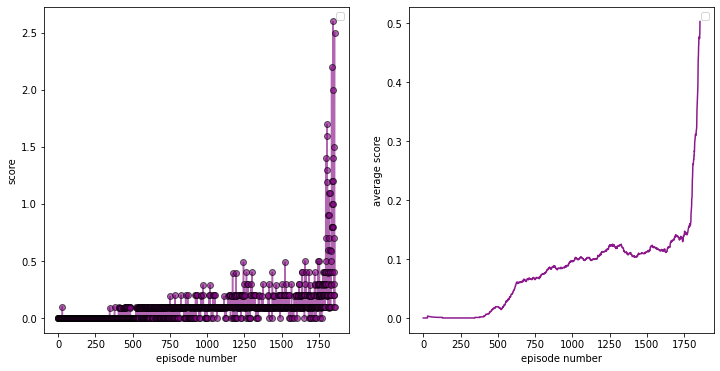

In [6]:
colors = ['purple', 'dodgerblue']
fig, axs = plt.subplots(1,2,figsize=(12,6))
ax, ax1 = axs
for color, scores, average_scores in zip(colors, scores_list, average_scores_list):
    ax.plot(np.arange(len(scores)), scores, '-o', mec='k', alpha=0.6, color=color
           )
    ax1.plot(np.arange(len(average_scores)), average_scores, alpha=0.9, color=color
           )
ax.set_xlabel('episode number')
ax1.set_xlabel('episode number')
ax.set_ylabel('score')
ax1.set_ylabel('average score')
ax.legend()
ax1.legend()
fig.savefig('scores_2.png')
fig.show()